In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./data/prepared/prepared_rfm.csv')


In [4]:
data.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CustomerID</th>
      <th>RecencyScore</th>
      <th>FrequencyScore</th>
      <th>MonetaryScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>12346.0</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
print(data.head(1))

   CustomerID  RecencyScore  FrequencyScore  MonetaryScore
0     12346.0             3               0              3


In [7]:
data['mean'] = (data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']) / 3

In [8]:
from sklearn.cluster.hierarchical import AgglomerativeClustering  
from sklearn.metrics import silhouette_score


In [9]:
K_values = range(2, 10, 1)
progress = 0
scores = []
for K in K_values:
    model = AgglomerativeClustering(n_clusters=K)
    model.fit(data)
    # clusters = kmeans.transform(data)
    score = silhouette_score(data, model.labels_)
    scores.append(score)
    
    progress += 1
    print ('\r' + str(int(100 * progress / len(K_values))), end='%')

    
    

12%

25%

37%

50%

62%

75%

87%

100%

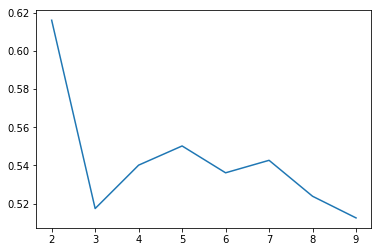

In [10]:
plt.plot(K_values, scores)


In [11]:
scores, list(K_values)

([0.6160858871226317,
  0.517413940967351,
  0.5401553672335886,
  0.5502098745246486,
  0.5361438722494669,
  0.5426873077497629,
  0.5238539207572954,
  0.5125035022055922],
 [2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
best_value = K_values[[i for i, j in enumerate(scores) if j == max(scores)][0]] # !
model = AgglomerativeClustering(n_clusters= best_value)
model.fit(data)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [13]:
clusters_df = pd.DataFrame()

In [14]:
clusters_df['SegmentNo'] = model.labels_

In [16]:
clusters_df['CustomerID'] = data['CustomerID']

In [17]:
clusters_df.to_csv('./results/segments_rfm_optional.csv', index=False)